In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Load YOLO model and class names
def load_yolo():
    net = cv2.dnn.readNet(r"yolov3.weights", 
                          r"yolov3.cfg")
    with open(r"coco.names", "r") as f:
        classes = [line.strip() for line in f.readlines()]

    layer_names = net.getLayerNames()
    unconnected_out_layers = net.getUnconnectedOutLayers()

    output_layers = []
    for i in unconnected_out_layers:
        index = i[0] if isinstance(i, np.ndarray) else i
        output_layers.append(layer_names[index - 1]) 
    return net, classes, output_layers



In [31]:
# Function to display the image  
def display_image(img):
    if img is None:
        print("Could not load image.")
    else:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   
        plt.imshow(img_rgb)
        plt.axis('off')   
        plt.show()




In [32]:
# Function for object detection
def detect_image(image_path, target_object):
    net, classes, output_layers = load_yolo()
    img = cv2.imread(image_path)
    
    height, width, channels = img.shape
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outputs = net.forward(output_layers)

    # Initialize variables
    class_ids = []
    confidences = []
    boxes = []

    # Loop through each detection
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:   
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply Non-Maxima Suppression
    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    # Draw boxes and labels
    if len(indices) > 0:   
        indices = indices.flatten()   
        for i in indices:
            box = boxes[i]
            x, y, w, h = box
            label = str(classes[class_ids[i]])
            if target_object in label:
                cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(img, label, (x, y + 30), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 2)

    # Display the output image
    display_image(img)



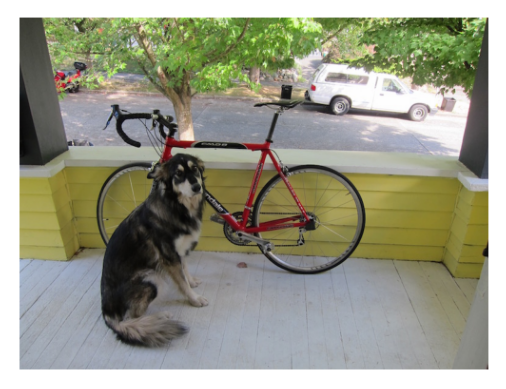

In [33]:
# Input Image
image_path = r"sample.png"

# Check if the image path exists
if not os.path.exists(image_path):
    print(f"The file at {image_path} does not exist.")
else:
    # Load the image and check if it's valid
    img = cv2.imread(image_path)
    if img is None:
        print("The Image is Invalid")
    else:
        display_image(img)   



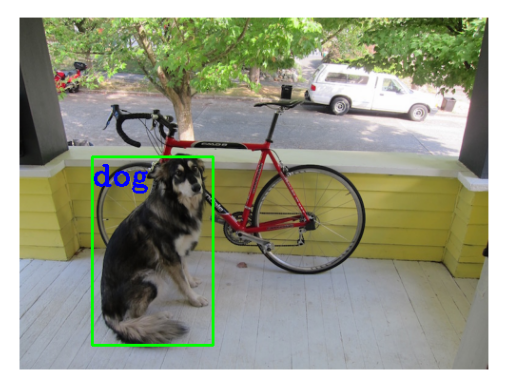

In [34]:
# Specify the object to detect
target_object = input("Enter the object to detect ")

# Detect the object
detect_image(image_path, target_object)